In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv(r'F:\Simplilearn\NLP\train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
X = df.drop('label',axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [5]:
y = df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [6]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
df.shape

(20800, 5)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [9]:
df = df.dropna()

In [10]:
data = df.copy()

In [11]:
data.reset_index(inplace=True)

In [12]:
data.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [13]:
len(data)

18285

In [14]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [15]:
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]',' ',data['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
corpus

['hous dem aid we didn t even see comey s letter until jason chaffetz tweet it',
 'flynn hillari clinton big woman on campu breitbart',
 'whi the truth might get you fire',
 'civilian kill in singl us airstrik have been identifi',
 'iranian woman jail for fiction unpublish stori about woman stone to death for adulteri',
 'jacki mason hollywood would love trump if he bomb north korea over lack of tran bathroom exclus video breitbart',
 'beno t hamon win french socialist parti s presidenti nomin the new york time',
 'a back channel plan for ukrain and russia courtesi of trump associ the new york time',
 'obama s organ for action partner with soro link indivis to disrupt trump s agenda',
 'bbc comedi sketch real housew of isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter in the arctic photo',
 'us offici see no link between trump and russia',
 're ye there are paid govern troll on social media blog forum and websit',
 'in major leagu soccer argentin find

In [17]:
## countvectorizer BOW
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X =cv.fit_transform(corpus).toarray()

In [18]:
X.shape

(18285, 5000)

In [19]:
y = data['label']
y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64

In [20]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [22]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abduct',
 'abe',
 'abedin',
 'abort',
 'about',
 'about hillari',
 'about the',
 'about to',
 'about trump',
 'abov',
 'absolut',
 'abus',
 'abus the',
 'abus the new',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [23]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [24]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

,abandon,abc,abduct,abe,abedin,abort,about,about hillari,about the,about to,...,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
import matplotlib.pyplot as plt

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## MultinomialNB Algorithm

In [27]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [28]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.900
Confusion matrix, without normalization


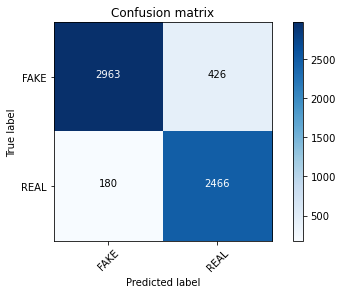

In [29]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [30]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8995857497928749

In [31]:
y_train.shape

(12250,)

## Passive Aggressive Classifier Algorithm

In [33]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.921
Confusion matrix, without normalization


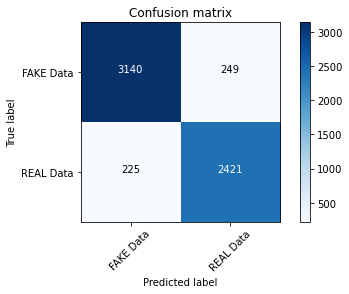

In [34]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

## Multinomial Classifier with Hyperparameter

In [35]:
classifier=MultinomialNB(alpha=0.1)

In [36]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8936205468102734
Alpha: 0.1, Score : 0.903728251864126
Alpha: 0.2, Score : 0.903893951946976
Alpha: 0.30000000000000004, Score : 0.9035625517812759
Alpha: 0.4, Score : 0.9025683512841757
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9009113504556753
Alpha: 0.7000000000000001, Score : 0.9007456503728252
Alpha: 0.8, Score : 0.899917149958575
Alpha: 0.9, Score : 0.8995857497928749


In [37]:
## Get Features names
feature_names = cv.get_feature_names()

In [38]:
feature_names

['abandon',
 'abc',
 'abduct',
 'abe',
 'abedin',
 'abort',
 'about',
 'about hillari',
 'about the',
 'about to',
 'about trump',
 'abov',
 'absolut',
 'abus',
 'abus the',
 'abus the new',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'access to',
 'accident',
 'accord',
 'accord to',
 'account',
 'accus',
 'accus of',
 'acknowledg',
 'acquit',
 'across',
 'across the',
 'act',
 'act the',
 'act the new',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit',
 'admit to',
 'adopt',
 'adult',
 'advanc',
 'advertis',
 'advic',
 'advis',
 'advisor',
 'advoc',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afghan',
 'afghanistan',
 'africa',
 'african',
 'african american',
 'after',
 'after elect',
 'after he',
 'after the',
 'after trump',
 'after year',
 'ag',
 'again',
 'again breitbart',
 'again the',
 'again the new',
 'against',
 'against hillari',
 

In [39]:
classifier.coef_[0]

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-9.4944907 , -9.01686315, -9.4944907 , ..., -8.69496312,
       -9.30877356, -9.72274936])

In [40]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-3.5174666564856754, 'the'),
 (-3.8310343160687044, 'to'),
 (-4.126323691212632, 'of'),
 (-4.27811410477075, 'in'),
 (-4.394251026750268, 'trump'),
 (-4.5399579597639015, 'on'),
 (-4.552994065578908, 'and'),
 (-4.582586400967607, 'for'),
 (-4.681974564588824, 'hillari'),
 (-4.69365304233125, 'is'),
 (-4.790491491206802, 'clinton'),
 (-5.075158455076539, 'by'),
 (-5.294071596354018, 'elect'),
 (-5.445727175973985, 'with'),
 (-5.481976160993134, 'it'),
 (-5.570700471043039, 'new'),
 (-5.62883223649405, 'comment'),
 (-5.650440683125662, 'from'),
 (-5.663633486610226, 'comment on'),
 (-5.668070051118914, 'video')]

In [41]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-11.18908642574201, 'abe'),
 (-11.18908642574201, 'abus the'),
 (-11.18908642574201, 'abus the new'),
 (-11.18908642574201, 'act the'),
 (-11.18908642574201, 'act the new'),
 (-11.18908642574201, 'advic'),
 (-11.18908642574201, 'again breitbart'),
 (-11.18908642574201, 'again the'),
 (-11.18908642574201, 'again the new'),
 (-11.18908642574201, 'ail'),
 (-11.18908642574201, 'ali'),
 (-11.18908642574201, 'america breitbart'),
 (-11.18908642574201, 'america the new'),
 (-11.18908642574201, 'ami'),
 (-11.18908642574201, 'amp'),
 (-11.18908642574201, 'ann'),
 (-11.18908642574201, 'ann coulter'),
 (-11.18908642574201, 'assail'),
 (-11.18908642574201, 'at cpac'),
 (-11.18908642574201, 'at the new'),
 (-11.18908642574201, 'athlet'),
 (-11.18908642574201, 'attack breitbart'),
 (-11.18908642574201, 'attack the new'),
 (-11.18908642574201, 'attend'),
 (-11.18908642574201, 'away the'),
 (-11.18908642574201, 'away the new'),
 (-11.18908642574201, 'ban the new'),
 (-11.18908642574201, 'bangladesh'